In [46]:
# Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## EDA

### Understanding the Dataset
- Dataset Description: Starting by understanding the dataset's structure, such as the number of rows and columns, types of variables (numerical, categorical), and the presence of any timestamps or geographical data.

- Target Variable: Identify the target variable, which in this case is property price.

In [47]:
# Load the dataset
file_path = 'session_7_dataset.xlsx'
df = pd.read_excel(file_path) # needed to install xlrd package first

In [48]:
# Display basic information about the dataset
dataset_info = df.info() # number of rows, number of columns, column names, data types, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17857 entries, 0 to 17856
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       17857 non-null  int64  
 1   inm_floor                                        14067 non-null  float64
 2   inm_size                                         16090 non-null  float64
 3   inm_price                                        17857 non-null  int64  
 4   inm_longitude                                    17857 non-null  float64
 5   inm_latitude                                     17857 non-null  float64
 6   inm_barrio                                       16063 non-null  object 
 7   inm_distrito                                     16110 non-null  object 
 8   his_price                                        17857 non-null  int64  
 9   his_quarterly_variation     

In [49]:
# print the number of rows and columns
print('Number of rows and columns:', df.shape)
# print the head (first 5 rows) of the dataset
print(df.head())

Number of rows and columns: (17857, 26)
   Unnamed: 0  inm_floor  inm_size  inm_price  inm_longitude  inm_latitude   
0           0        3.0     141.0     990000      -3.656875     40.464347  \
1           1        2.0     159.0     940000      -3.703523     40.419427   
2           2        NaN       NaN     549000      -3.669626     40.435362   
3           3        2.0     232.0     750000      -3.720619     40.424164   
4           4        4.0     183.0    1550000      -3.705909     40.413214   

    inm_barrio       inm_distrito  his_price  his_quarterly_variation  ...   
0     Canillas          Hortaleza       3250                      2.2  ...  \
1  Universidad             Centro       5106                      1.4  ...   
2   Guindalera          Salamanca       4100                      0.6  ...   
3    Argüelles  Moncloa - Aravaca       4773                      0.5  ...   
4          Sol             Centro       4739                     -5.5  ...   

   dem_TasaDeParo  dem

#### Observations:
Described Features:
- inm_floor: Number of floors (14,067 non-null values).
- inm_size: Property size in square meters (16,090 non-null values).
- inm_price: Price of the property (17,857 non-null values) - This is the target variable.
- inm_longitude: Longitude coordinates (17,857 non-null values).
- inm_latitude: Latitude coordinates (17,857 non-null values).
- inm_barrio: Property neighborhood name (16,063 non-null values).
- inm_distrito: Property district name (16,110 non-null values).
- his_price: Historical price of the property (17,857 non-null values).
- his_quarterly_variation: Historical quarterly variation (17,857 non-null values).
- his_annual_variation: Historical annual variation (17,857 non-null values).
- his_monthly_variation: Historical annual variation (17,857 non-null values).

Other Features: There are several other features, many related to demographic information (like indices of youth, employment rates, average household size, education levels, etc.), with all having 17,857 non-null values. It seems these demographic features are tied to the location of the property.

Data Types: The dataset comprises a mix of numerical (floats and integers) and categorical (object) data types.
Given the presence of non-null values in critical features like inm_price, inm_size, inm_longitude, and inm_latitude, these will likely be key in our analysis. However, there are missing values in some columns like inm_floor, inm_size, inm_barrio, and inm_distrito, which will need to be addressed in the data cleaning step.

### Data Cleaning
- Missing Values: Identify and handle missing values. Options include imputing missing values, removing rows or columns with too many missing values, or using algorithms that can handle missing data.
- Outliers: Detect and manage outliers, as they can skew the results of a regression analysis. Techniques include using IQR (Interquartile Range) or Z-scores.
- Duplicate Records: Check for and remove any duplicate entries to prevent biased results.

In [50]:
# Drop the first column 'Unnamed: 0' which is from the excel file
df = df.drop('Unnamed: 0', axis=1)

In [51]:
# Step 1: Handling Missing Values
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Decide on a threshold for removing columns with too many missing values
threshold = 30  # columns with more than 30% missing values will be dropped
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop these columns
df_cleaned = df.drop(columns=columns_to_drop)

# Impute missing values in the remaining columns
# For simplicity, impute numerical columns with median and categorical with mode
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)
    else:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)





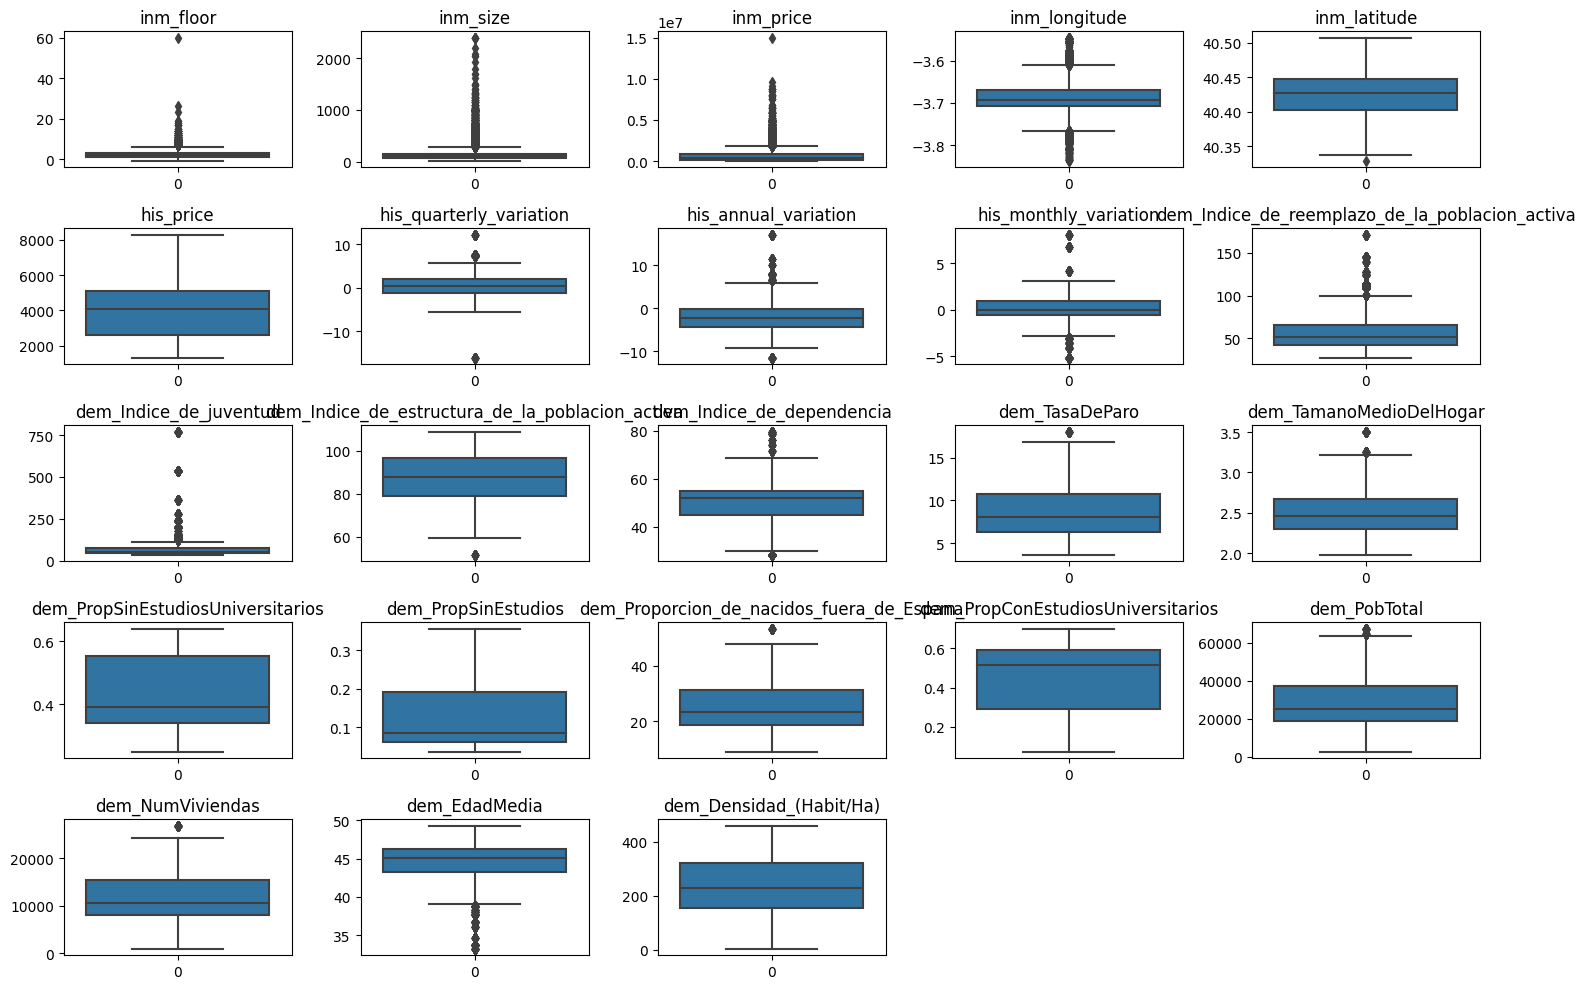

In [52]:
# Step 2: Detecting and Managing Outliers with Box Plots
# Select numerical columns for outlier detection
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots before handling outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(df_cleaned[col])
    plt.title(col)
    plt.tight_layout()


In [53]:
# Apply IQR method to handle outliers
Q1 = df_cleaned[numerical_cols].quantile(0.25)
Q3 = df_cleaned[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Cap and floor values outside 1.5*IQR
df_outliers_handled = df_cleaned.copy()
df_outliers_handled[numerical_cols] = df_cleaned[numerical_cols].clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR, axis=1)

In [54]:
# Step 3: Removing Duplicate Records
df_final = df_outliers_handled.drop_duplicates()


In [55]:
# Summarize changes
num_rows_cleaned, num_cols_cleaned = df_final.shape
num_rows, num_cols = df.shape
num_dropped_columns = num_cols - num_cols_cleaned
num_dropped_rows = num_rows - num_rows_cleaned

num_rows_cleaned, num_cols_cleaned, num_dropped_columns, num_dropped_rows, missing_percentage, columns_to_drop

(17837,
 25,
 0,
 20,
 inm_floor                                          21.224170
 inm_size                                            9.895279
 inm_price                                           0.000000
 inm_longitude                                       0.000000
 inm_latitude                                        0.000000
 inm_barrio                                         10.046480
 inm_distrito                                        9.783278
 his_price                                           0.000000
 his_quarterly_variation                             0.000000
 his_annual_variation                                0.000000
 his_monthly_variation                               0.000000
 dem_Indice_de_reemplazo_de_la_poblacion_activa      0.000000
 dem_Indice_de_juventud                              0.000000
 dem_Indice_de_estructura_de_la_poblacion_activa     0.000000
 dem_Indice_de_dependencia                           0.000000
 dem_TasaDeParo                                 

#### Data Cleaning Conclusions:

##### Missing Values:
- No columns were dropped based on the threshold of 30% missing values, as none exceeded this limit.
- Missing values in numerical columns were imputed with the median, and in categorical columns with the mode.

##### Outliers:
- Box plots were generated for each numerical feature to visualize outliers.
- The Interquartile Range (IQR) method was used to cap and floor extreme values. This method adjusts values that are below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, reducing the impact of outliers.

##### Duplicate Records:
- No duplicate records were found.

### Data transformation
- Feature Engineering: Create new features that might be relevant for predicting property prices, like distance to the city center, property age, or a combination of existing features.
- Normalization/Standardization: Apply normalization or standardization to the numeric data to bring everything to a similar scale, which is important for many regression models.
- Encoding Categorical Variables: Convert categorical variables into a format that can be provided to machine learning models (like one-hot encoding or label encoding).

